## 02 Data Processing

#### Import relevant libraries

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

#### Load raw data

In [2]:
input_dir = os.path.join('..', 'data', 'original')
exp_df = pd.read_csv(os.path.join(input_dir, 'expenditure_bills_burden.csv'))
hui_df = pd.read_csv(os.path.join(input_dir, 'housing_units_income.csv'))
aei_df = pd.read_csv(os.path.join(input_dir, 'assets_earnings_investments.csv'))
sales_df = pd.read_csv(os.path.join(input_dir, 'customers_sales.csv'))
rps_df = pd.read_csv(os.path.join(input_dir, 'state_targets.csv'))
usm_df = pd.read_csv(os.path.join(input_dir, 'utility_state_map.csv'))
utype_df = pd.read_csv(os.path.join(input_dir, 'utility_information.csv'))
gen_df = pd.read_csv(os.path.join(input_dir, 'operations_emissions_by_tech.csv'))

In [3]:
exp_df.head()

,parent_name,utility_name,respondent_id,year,percent_AMI,ownership,electricity_gas_other,technology,expenditure,bill,burden
0,Southern Co.,Alabama Power Co.,2.0,2020,0-30%,owner,Electricity,adjustment,9.276270e+06,8.394506,0.009773
1,Southern Co.,Alabama Power Co.,2.0,2020,0-30%,owner,Electricity,distribution,3.017570e+07,27.307328,0.031792
2,Southern Co.,Alabama Power Co.,2.0,2020,0-30%,owner,Electricity,hydro,4.312818e+06,3.902860,0.004544
3,Southern Co.,Alabama Power Co.,2.0,2020,0-30%,owner,Electricity,nuclear,1.912960e+07,17.311221,0.020154
4,Southern Co.,Alabama Power Co.,2.0,2020,0-30%,owner,Electricity,other,1.578084e+07,14.280782,0.016626


In [4]:
hui_df.head()

,parent_name,utility_name,respondent_id,year,percent_AMI,ownership,housing_units,income
0,Southern Co.,Alabama Power Co.,2.0,2020,0-30%,owner,92086.710664,9.491514e+08
1,Southern Co.,Alabama Power Co.,2.0,2020,0-30%,renter,126159.321739,1.238083e+09
2,Southern Co.,Alabama Power Co.,2.0,2020,100%+,owner,521425.299562,6.049073e+10
3,Southern Co.,Alabama Power Co.,2.0,2020,100%+,renter,111421.757248,9.494001e+09
4,Southern Co.,Alabama Power Co.,2.0,2020,30-60%,owner,108469.889403,2.541532e+09


In [5]:
aei_df.head()

,parent_name,utility_name,respondent_id,year,asset,sub_asset,asset_value,earnings_value,investment_value
0,"American Electric Power Co., Inc.",AEP Generating Co.,1.0,2020,other,AROs,-15405378.0,-0.0,NaN
1,"American Electric Power Co., Inc.",AEP Generating Co.,1.0,2020,other,electric_plant_held_for_future_use,1034099.0,0.0,NaN
2,"American Electric Power Co., Inc.",AEP Generating Co.,1.0,2020,other,electric_plant_leased_to_others,155616036.0,0.0,NaN
3,"American Electric Power Co., Inc.",AEP Generating Co.,1.0,2020,other,general_plant,427318.0,0.0,1846.0
4,"American Electric Power Co., Inc.",AEP Generating Co.,1.0,2020,other,intangible_plant,724784.0,0.0,NaN


In [6]:
sales_df.head()

,parent_name,utility_name,respondent_id,year,customer_type,customer_type_rmi,customers,sales,revenues
0,"American Electric Power Co., Inc.",AEP Generating Co.,1,2020,sales_for_resale,sales_for_resale,NaN,2019392.0,246848141.0
1,"American Electric Power Co., Inc.",AEP Generating Co.,1,2019,sales_for_resale,sales_for_resale,NaN,4073472.0,306947627.0
2,"American Electric Power Co., Inc.",AEP Generating Co.,1,2018,sales_for_resale,sales_for_resale,2.0,5947055.0,339868815.0
3,"American Electric Power Co., Inc.",AEP Generating Co.,1,2017,sales_for_resale,sales_for_resale,2.0,6069003.0,340871490.0
4,"American Electric Power Co., Inc.",AEP Generating Co.,1,2016,sales_for_resale,sales_for_resale,3.0,13491086.0,563840279.0


In [7]:
rps_df.head()

,state,year,year_type,legal_standard,enforcement_standard,target_type,target_value
0,Alabama,NaN,ghg_base_year,None,None,base_target,NaN
1,Alabama,NaN,ghg_final_year,None,None,ghg_final_target,0
2,Alabama,NaN,ghg_interim_year,None,None,ghg_interim_target,NaN
3,Alabama,NaN,rps_final_year,None,None,rps_final_target,0
4,Alabama,NaN,rps_interim_year,None,None,rps_interim_target,NaN


In [8]:
usm_df.head()

,parent_name,utility_name,respondent_id,year,state_abbr,state,capacity_owned_in_state,capacity_operated_in_state,mwh_sales_in_state
0,"American Electric Power Co., Inc.",AEP Generating Co.,1.0,2020,IN,Indiana,455.0,NaN,NaN
1,"American Electric Power Co., Inc.",AEP Generating Co.,1.0,2019,IN,Indiana,455.0,NaN,NaN
2,"American Electric Power Co., Inc.",AEP Generating Co.,1.0,2018,IN,Indiana,455.0,NaN,NaN
3,"American Electric Power Co., Inc.",AEP Generating Co.,1.0,2017,IN,Indiana,455.0,NaN,NaN
4,"American Electric Power Co., Inc.",AEP Generating Co.,1.0,2016,IN,Indiana,723.0,1232.0,NaN


#### Formatting data

(a) Rename columns

In [9]:
exp_df = exp_df.rename({'percent_AMI': 'percent_ami'}, axis='columns')
hui_df = hui_df.rename({'percent_AMI': 'percent_ami'}, axis='columns')

(b) Fix string -> Float types

In [10]:
rps_df['target_value'] = rps_df['target_value'].replace('105MW', 0.0)  # update for % value
rps_df['target_value'] = rps_df['target_value'].replace('10GW', 0.0)
rps_df['year'] = rps_df['year'].replace('Annual', 0)

(c) Data type formatting

In [11]:
exp_df.dtypes

parent_name               object
utility_name              object
respondent_id            float64
year                       int64
percent_ami               object
ownership                 object
electricity_gas_other     object
technology                object
expenditure              float64
bill                     float64
burden                   float64
dtype: object

In [12]:
hui_df.dtypes

parent_name       object
utility_name      object
respondent_id    float64
year               int64
percent_ami       object
ownership         object
housing_units    float64
income           float64
dtype: object

In [13]:
aei_df.dtypes

parent_name          object
utility_name         object
respondent_id       float64
year                  int64
asset                object
sub_asset            object
asset_value         float64
earnings_value      float64
investment_value    float64
dtype: object

In [14]:
sales_df.dtypes

parent_name           object
utility_name          object
respondent_id          int64
year                   int64
customer_type         object
customer_type_rmi     object
customers            float64
sales                float64
revenues             float64
dtype: object

#### Join datasets

Prepare expenditure_bills_burden.csv data frame

In [15]:
# make a copy
exp_prepared_df = exp_df.copy()

In [16]:
# groupby utility x year
exp_prepared_df = exp_prepared_df.groupby(['respondent_id', 'year', 'technology'])\
    .agg({'bill': ['sum'], 'expenditure': ['sum']})\
    .reset_index()
exp_prepared_df = exp_prepared_df.droplevel(1, axis=1)

In [17]:
# pivot by technology 
exp_prepared_df = exp_prepared_df.pivot(
        index=['respondent_id', 'year'],
        columns='technology',
        values=['bill', 'expenditure']
)
exp_prepared_df.columns = ['_'.join(col).strip() for col in exp_prepared_df.columns.values]
exp_prepared_df.columns = exp_prepared_df.columns.str.lower()
exp_prepared_df.columns = exp_prepared_df.columns.to_flat_index()
exp_prepared_df = exp_prepared_df.reset_index()

In [18]:
exp_prepared_df.head()

,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,...,expenditure_adjustment,expenditure_distribution,expenditure_hydro,expenditure_nuclear,expenditure_other,expenditure_other_fossil,expenditure_purchased_power,expenditure_renewables,expenditure_steam,expenditure_transmission
0,2.0,2005,375.031464,7.084629,9.540319,140.598363,24.935923,79.832394,93.020037,115.705892,...,1.425108e+07,2.100222e+08,3.724864e+07,1.192516e+08,1.389510e+08,1.728385e+08,1.870094e+08,0.0,4.974018e+08,9.923683e+07
1,2.0,2006,403.967434,8.175744,20.977633,150.312633,25.845165,83.786720,112.218061,136.302804,...,3.165222e+07,2.268000e+08,3.899662e+07,1.264220e+08,1.693208e+08,2.056612e+08,1.829700e+08,0.0,5.747494e+08,1.077316e+08
2,2.0,2007,362.674741,9.373432,25.958163,162.860281,26.922500,86.942468,136.816315,146.322099,...,3.959165e+07,2.483961e+08,4.106246e+07,1.326055e+08,2.086736e+08,2.231719e+08,2.064529e+08,0.0,6.174916e+08,1.161173e+08
3,2.0,2008,389.722554,12.139279,17.184093,161.259248,25.216835,87.957893,136.354090,157.862545,...,2.642192e+07,2.479490e+08,3.877291e+07,1.352423e+08,2.096554e+08,2.427263e+08,2.337353e+08,0.0,7.437904e+08,1.193094e+08
4,2.0,2009,368.234034,10.900991,22.232564,178.909959,25.595063,94.547352,144.596841,136.960261,...,3.462866e+07,2.786639e+08,3.986597e+07,1.472636e+08,2.252190e+08,2.133245e+08,1.387760e+08,0.0,7.525156e+08,1.314208e+08


Prepare housing_units_income.csv data frame

In [19]:
# make a copy
hui_prepared_df = hui_df.copy()

In [20]:
# drop repeated columns
hui_prepared_df = hui_prepared_df.drop(columns=[
    'parent_name', 
    'utility_name', 
    'ownership',
])

In [21]:
# groupby utility x year
hui_prepared_df = hui_prepared_df.groupby(['respondent_id', 'year'])\
    .agg({'housing_units': ['sum'], 'income': ['sum']})\
    .reset_index()
hui_prepared_df = hui_prepared_df.droplevel(1, axis=1)

In [22]:
hui_prepared_df.head()

,respondent_id,year,housing_units,income
0,2.0,2005,1177707.0,6.002705e+10
1,2.0,2006,1189597.0,6.287944e+10
2,2.0,2007,1202491.0,6.652127e+10
3,2.0,2008,1212244.0,6.973237e+10
4,2.0,2009,1228000.0,6.732521e+10


Prepare assets_earnings_income.csv data frame

In [23]:
# make a copy
aei_prepared_df = aei_df.copy()

In [24]:
# drop repeated columns
aei_prepared_df = aei_prepared_df.drop(columns=[
    'parent_name', 
    'utility_name', 
])

In [25]:
# groupby utility x year
aei_prepared_df = aei_prepared_df.groupby(['respondent_id', 'year', 'asset'])\
    .agg({'asset_value': ['sum'], 'earnings_value': ['sum'], 'investment_value': ['sum']})\
    .reset_index()
aei_prepared_df = aei_prepared_df.droplevel(1, axis=1)

In [26]:
# pivot by asset 
aei_prepared_df = aei_prepared_df.pivot(
        index=['respondent_id', 'year'],
        columns='asset',
        values=['asset_value', 'earnings_value', 'investment_value']
)
aei_prepared_df.columns = ['_'.join(col).strip() for col in aei_prepared_df.columns.values]
aei_prepared_df.columns = aei_prepared_df.columns.str.lower()
aei_prepared_df.columns = aei_prepared_df.columns.to_flat_index()
aei_prepared_df = aei_prepared_df.reset_index()

In [27]:
aei_prepared_df.head()

,respondent_id,year,asset_value_distribution,asset_value_hydro,asset_value_nuclear,asset_value_other,asset_value_other_fossil,asset_value_renewables,asset_value_steam,asset_value_transmission,...,earnings_value_steam,earnings_value_transmission,investment_value_distribution,investment_value_hydro,investment_value_nuclear,investment_value_other,investment_value_other_fossil,investment_value_renewables,investment_value_steam,investment_value_transmission
0,1.0,2005,NaN,NaN,NaN,-1.640519e+08,NaN,NaN,2.656242e+08,NaN,...,0.0,NaN,NaN,NaN,NaN,321685.0,NaN,NaN,10648224.0,NaN
1,1.0,2006,NaN,NaN,NaN,-1.388877e+08,NaN,NaN,2.506720e+08,NaN,...,0.0,NaN,NaN,NaN,NaN,321958.0,NaN,NaN,7159107.0,NaN
2,1.0,2007,NaN,NaN,NaN,-7.481310e+07,307116436.0,NaN,2.684942e+08,NaN,...,0.0,NaN,NaN,NaN,NaN,2958905.0,0.0,NaN,36888943.0,NaN
3,1.0,2008,NaN,NaN,NaN,7.355553e+07,308800985.0,NaN,2.597126e+08,NaN,...,0.0,NaN,NaN,NaN,NaN,3109017.0,0.0,NaN,15305385.0,NaN
4,1.0,2009,NaN,NaN,NaN,7.225845e+07,303881470.0,NaN,2.656392e+08,5153527.0,...,0.0,0.0,NaN,NaN,NaN,1553733.0,0.0,NaN,34984605.0,1937818.0


Prepare customer_sales.csv data frame

In [28]:
# make a copy
sales_prepared_df = sales_df.copy()

In [29]:
# drop repeated columns
sales_prepared_df = sales_prepared_df.drop(columns=[
    'parent_name',
    'utility_name',
])

In [30]:
# groupby utility x year
sales_prepared_df = sales_prepared_df[sales_prepared_df['customer_type_rmi']=='residential']
sales_prepared_df = sales_prepared_df.groupby(['respondent_id', 'year'])\
    .agg({'customers': ['sum'], 'revenues': ['sum'], 'sales': ['sum']})\
    .reset_index()
sales_prepared_df = sales_prepared_df.droplevel(1, axis=1)

In [31]:
sales_prepared_df.head()

,respondent_id,year,customers,revenues,sales
0,2,2005,1177707.0,1.476211e+09,18073783.0
1,2,2006,1189597.0,1.664304e+09,18632935.0
2,2,2007,1202491.0,1.833563e+09,18874039.0
3,2,2008,1212244.0,1.997603e+09,18379801.0
4,2,2009,1228000.0,1.961678e+09,18071471.0


Prepare state_targets.csv and utility_state_map.csv data frames

In [32]:
# make a copy
rps_prepared_df = rps_df.copy()
usm_prepared_df = usm_df.copy()

In [33]:
# filter for relevant data
rps_prepared_df = rps_prepared_df[rps_prepared_df['target_type'] == 'rps_final_target']
rps_prepared_df = rps_prepared_df[['state', 'year', 'target_value']]
usm_prepared_df = usm_prepared_df[['respondent_id', 'year', 'state', 'capacity_operated_in_state']]

In [34]:
# compute weighted rps value
rps_prepared_df = rps_prepared_df.fillna(0)
weight = np.where(rps_prepared_df['year'].astype(int) != 0, 
                  1 - ((rps_prepared_df['year'].astype(int)-2000) / 100), 
                  0.0)
rps_prepared_df['weighted_value'] = weight * rps_prepared_df['target_value'].astype(float)

In [35]:
# compute state % of total capcity
usm_prepared_df = usm_prepared_df.fillna(0)
total_by_utility_year = usm_prepared_df.groupby(['respondent_id', 'year'])\
    .agg({'capacity_operated_in_state': ['sum']})\
    .reset_index()
total_by_utility_year = total_by_utility_year.droplevel(1, axis=1)
total_by_utility_year = total_by_utility_year.rename(columns={"capacity_operated_in_state": "total_utility_capacity"})
usm_prepared_df = pd.merge(usm_prepared_df, 
                           total_by_utility_year, 
                           how='inner', on=['respondent_id', 'year'])
usm_prepared_df['state_pct_capacity'] = usm_prepared_df['capacity_operated_in_state'] / usm_prepared_df['total_utility_capacity']
usm_prepared_df = usm_prepared_df.fillna(0)

(array([2456.,  210.,  116.,  143.,  147.,   93.,   59.,  104.,  129.,
        1795.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

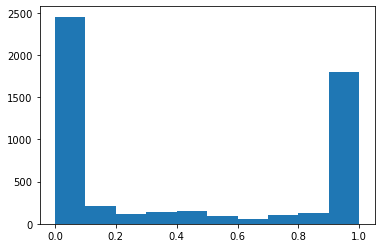

In [36]:
# join rps and state utility data
rps_usm_df = pd.merge(usm_prepared_df, rps_prepared_df.drop(columns=['year']), how='outer', on=['state'])
plt.hist(usm_prepared_df['state_pct_capacity'])

In [37]:
# compute weighted rps score by utility-year-state
rps_usm_df['rps_score'] = rps_usm_df['state_pct_capacity'] * rps_usm_df['weighted_value']
rps_usm_df = rps_usm_df.fillna(0)

In [38]:
# groupby utility and year
rps_usm_prepared_df = rps_usm_df.copy()
rps_usm_prepared_df = rps_usm_prepared_df[['respondent_id', 'year', 'state', 'rps_score']]
rps_usm_prepared_df = rps_usm_df.groupby(['respondent_id', 'year'])\
    .agg({'rps_score': ['sum']})\
    .reset_index()
rps_usm_prepared_df = rps_usm_prepared_df.droplevel(1, axis=1)
rps_usm_prepared_df.head()
    

,respondent_id,year,rps_score
0,0.0,0.0,0.0
1,1.0,2005.0,0.0
2,1.0,2006.0,0.0
3,1.0,2007.0,7.5
4,1.0,2008.0,7.5


Prepare utype_df.csv dataframe

(array([ 39.,   0.,  66.,   0.,   0., 175.,   0.,  25.,   0.,  98.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

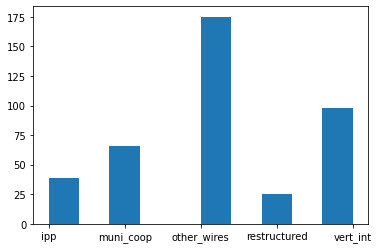

In [39]:
utype_prepared_df = utype_df.copy()
utype_prepared_df = utype_prepared_df[['respondent_id', 'utype']]
#utype: ipp is independent power producers, other_wires is other and wires, vert_int is vertically integrated, 
#restructured, muni_coop is munis and coops
utype_prepared_df.describe
plt.hist(utype_prepared_df['utype'])

Prepare operations_emissions_by_tech.csv dataframe

In [40]:
gen_prepared_df = gen_df.copy()
#generation in tWh
gen_prepared_df = gen_prepared_df[['respondent_id', 'year','technology_RMI','generation']]
#want to groupby respondent id, year, and technology, and sum generation
gen_prepared_df = gen_prepared_df.groupby(['respondent_id', 'year','technology_RMI'])\
    .agg({'generation': ['sum']})\
    .reset_index()
gen_prepared_df = gen_prepared_df.droplevel(1, axis=1)
gen_prepared_df.head()

,respondent_id,year,technology_RMI,generation
0,1,2005,Steam,6.279800
1,1,2006,Steam,7.124913
2,1,2007,Other Fossil,0.966070
3,1,2007,Steam,5.639989
4,1,2008,Other Fossil,0.675937


In [41]:
gen_prepared_df = gen_prepared_df.pivot(
        index=['respondent_id', 'year'],
        columns='technology_RMI',
        values=['generation']
)
gen_prepared_df.columns = ['_'.join(col).strip() for col in gen_prepared_df.columns.values]
gen_prepared_df.columns = gen_prepared_df.columns.str.lower()
gen_prepared_df.columns = gen_prepared_df.columns.to_flat_index()
gen_prepared_df = gen_prepared_df.reset_index()
gen_prepared_df = gen_prepared_df.fillna(0)
gen_prepared_df = gen_prepared_df.rename(columns={
    "generation_ee & dr": "generation_ee_dr",
    "generation_other fossil": "generation_other_fossil",
    "generation_purchased power": "generation_purchased_power",
    "generation_renewables and storage": "generation_renewables_and_storage"
})
gen_prepared_df.head()

,respondent_id,year,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_purchased_power,generation_renewables_and_storage,generation_steam
0,1,2005,0.0,0.0,0.0,0.000000,0.0,0.0,6.279800
1,1,2006,0.0,0.0,0.0,0.000000,0.0,0.0,7.124913
2,1,2007,0.0,0.0,0.0,0.966070,0.0,0.0,5.639989
3,1,2008,0.0,0.0,0.0,0.675937,0.0,0.0,6.965257
4,1,2009,0.0,0.0,0.0,0.553254,0.0,0.0,6.553973


Join datasets into one dataframe

In [42]:
raw_df = pd.merge(exp_prepared_df, hui_prepared_df, how='inner', on=['respondent_id', 'year'])
raw_df = pd.merge(raw_df, aei_prepared_df, how='inner', on=['respondent_id', 'year'])
raw_df = pd.merge(raw_df, sales_prepared_df, how='inner', on=['respondent_id', 'year'])
raw_df = pd.merge(raw_df, rps_usm_prepared_df, how='inner', on=['respondent_id', 'year'])
raw_df=pd.merge(raw_df, utype_prepared_df, how='inner', on=['respondent_id'])
raw_df=pd.merge(raw_df,gen_prepared_df, how='inner', on=['respondent_id','year'])
raw_df.head(10)

,respondent_id,year,bill_gas,bill_other fuel,bill_adjustment,bill_distribution,bill_hydro,bill_nuclear,bill_other,bill_other_fossil,...,sales,rps_score,utype,generation_ee_dr,generation_hydro,generation_nuclear,generation_other_fossil,generation_purchased_power,generation_renewables_and_storage,generation_steam
0,2.0,2005,375.031464,7.084629,9.540319,140.598363,24.935923,79.832394,93.020037,115.705892,...,18073783.0,0.0,vert_int,0.001164,4.436797,13.738337,5.483874,8.473223,0.0,49.987032
1,2.0,2006,403.967434,8.175744,20.977633,150.312633,25.845165,83.786720,112.218061,136.302804,...,18632935.0,0.0,vert_int,0.002765,2.812857,14.039622,6.153681,8.771999,0.0,50.243436
2,2.0,2007,362.674741,9.373432,25.958163,162.860281,26.922500,86.942468,136.816315,146.322099,...,18874039.0,0.0,vert_int,1.237031,1.403520,13.097867,6.950935,9.521604,0.0,51.081573
3,2.0,2008,389.722554,12.139279,17.184093,161.259248,25.216835,87.957893,136.354090,157.862545,...,18379801.0,0.0,vert_int,1.300172,2.477033,14.073225,7.199782,9.015558,0.0,49.206599
4,2.0,2009,368.234034,10.900991,22.232564,178.909959,25.595063,94.547352,144.596841,136.960261,...,18071471.0,0.0,vert_int,0.684756,5.903936,13.973577,8.799929,5.808104,0.0,41.204845
5,2.0,2010,375.715469,13.529815,57.306195,207.855781,29.301764,108.447788,146.998675,147.119361,...,20417032.0,0.0,vert_int,0.595833,3.707895,13.169684,10.337048,4.793492,0.0,44.022450
6,2.0,2011,310.984887,10.408721,65.922993,198.367910,28.815423,106.466901,123.115743,132.823094,...,18650366.0,0.0,vert_int,0.049948,3.038090,14.431250,10.666586,4.675221,0.0,39.396937
7,2.0,2012,251.854838,7.318077,63.958472,193.694724,28.306831,116.294001,135.947289,111.941675,...,17612420.0,0.0,vert_int,0.070519,2.660740,14.762977,10.724467,5.435726,0.0,33.224328
8,2.0,2013,305.709743,8.302617,47.394754,196.508342,27.988239,116.667248,137.888028,119.111570,...,17919762.0,0.0,vert_int,0.085471,5.624866,14.098022,10.739554,4.010261,0.0,35.701607
9,2.0,2014,321.439930,9.774353,23.646072,206.273280,30.414294,121.274889,148.945759,127.578481,...,18726485.0,0.0,vert_int,0.096536,3.892956,14.505389,10.738816,6.554533,0.0,35.361499


(array([1168.,    0.,    0.,  496.,    0.,    0.,  224.,    0.,    0.,
          16.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

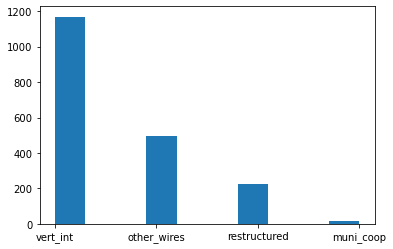

In [43]:
plt.hist(raw_df['utype'])

#### Data cleaning

In [44]:
# make a copy
clean_df = raw_df.copy()

(a) Impute values for missing data

In [45]:
clean_df = clean_df.fillna(0) 

(b) Remove probable outliers

In [46]:
# negative investments ...
# align naming for assets = technology ...

(c) Compute consumer energy burden

In [47]:
clean_df['energy_burden'] = clean_df['revenues'] / clean_df['income']

(d) Compute normalized expenditure (price)

In [48]:
clean_df['normalized_expenditure'] = clean_df['revenues'] / clean_df['sales'] 

#### Save processed_data file

In [49]:
# make a copy
processed_df = clean_df.copy()

In [50]:
# save to output directory
output_dir = os.path.join('..', 'data', 'processed')
processed_df.to_csv(os.path.join(output_dir, 'processed_data.csv'), index=False)